# Respiration

In [20]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy import signal
import os
from operator import itemgetter
from scipy.interpolate import interp1d

268269-2425-MDC_RESP-62.5.csv:


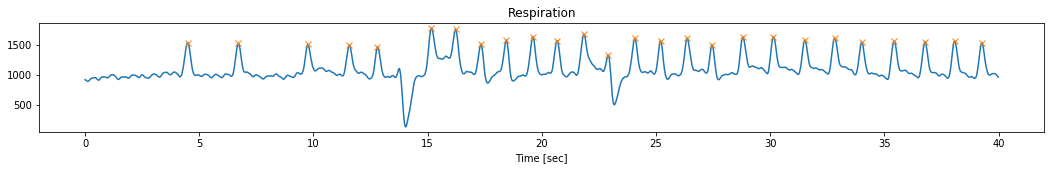

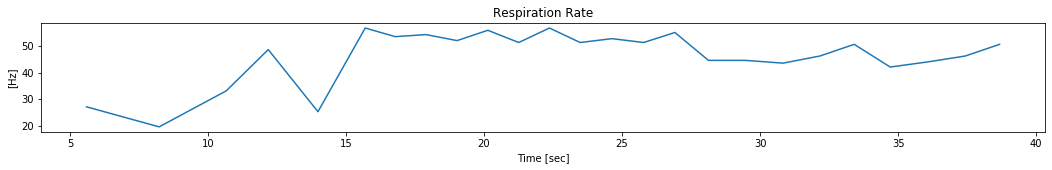

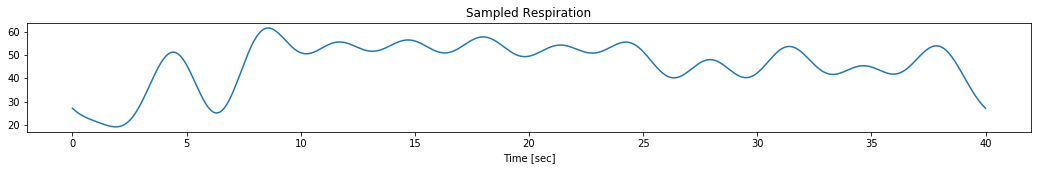

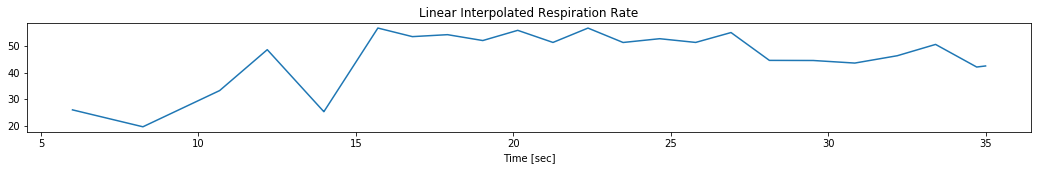

In [21]:
START_POINT=0
END_POINT=40 # must be even number
t = np.arange(START_POINT, END_POINT, 0.016)
F = 1000

resp = []
rr_list = []
for filename in os.listdir('samples'):
    if "MDC_RESP-62.5" in filename:
        print(filename+':')
        with open('samples/'+filename, 'r') as f:
            reader = csv.reader(f)
            for row in reader:
                resp.append(float(row[1]))
                
            resp_small = np.array(resp[(int)(START_POINT*62.5):(int)(END_POINT*62.5)])            
            peaks,_=find_peaks(resp_small, distance=30, height=1200)
            peaks_sec = (peaks + START_POINT*62.5) * 0.016
            
            plt.figure(figsize=(18, 2))
            plt.plot(t,resp_small)
            plt.plot(peaks_sec, resp_small[peaks], "x")
            plt.title('Respiration')
            plt.xlabel('Time [sec]')
            plt.show()
            
            diffs = np.diff(peaks_sec)
            peaks_sec = peaks_sec[:len(diffs)]+diffs/2
            rr = 60/diffs
            
            plt.figure(figsize=(18, 2))
            plt.plot(peaks_sec,rr)
            plt.title('Respiration Rate')
            plt.xlabel('Time [sec]')
            plt.ylabel('[Hz]')
            plt.show()
                        
            sampled_resp = signal.resample(rr, F*(END_POINT-START_POINT))
            sampled_t = np.arange(START_POINT, END_POINT, 1/F)
            
            plt.figure(figsize=(18, 2))
            plt.plot(sampled_t,sampled_resp)
            plt.title('Sampled Respiration')
            plt.xlabel('Time [sec]')
            plt.show()
            
            rr_list.append(sampled_resp)
            resp = []
            
            rr_interp_func = interp1d(peaks_sec, rr)
            time = np.linspace(6, 35, num=100000)
            
            plt.figure(figsize=(18, 2))
            plt.plot(time,rr_interp_func(time))
            plt.title('Linear Interpolated Respiration Rate')
            plt.xlabel('Time [sec]')
            plt.show()